## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn import linear_model, ensemble, model_selection, metrics, tree, neighbors
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn import decomposition, feature_selection, svm, neighbors, datasets, preprocessing, neural_network 
from matplotlib import pyplot

In [2]:
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from collections import Counter

## Load Data

#### Single X matrix and Single Y matrix

In [3]:
X = pd.read_table('Output/Avalon_BMatrix_map_2018_07.tsv')
X[X.columns[0]] = X[X.columns[0]].astype(str)
X = X.set_index(X.columns[0])
# X = X.T

# Y = pd.read_table('Output/L1000_signatures_pertid_2018_07.tsv')
# Y.set_index(Y.columns[0], inplace = True)
# Y = Y.T

# print(X.shape, Y.shape)

In [4]:
Y = pd.read_table('Input/consensus-perts.tsv')
Y.set_index('pert_id', inplace=True)
print( Y.shape)

(13072, 978)


In [5]:
Y.head()

,10007,1001,10013,10038,10046,10049,10051,10057,10058,10059,...,9918,9924,9926,9928,993,994,9943,9961,998,9988
pert_id,,,,,,,,,,,,,,,,,,,,,
BRD-A00100033,-0.065,3.696,-1.701,-0.156,-0.632,0.215,-0.056,-0.741,-1.280,-0.242,...,0.082,0.690,-0.256,-0.290,-0.092,-0.878,-0.949,0.066,0.070,3.351
BRD-A00150179,0.179,1.264,1.399,0.492,-0.337,-0.907,0.441,-0.462,0.011,0.815,...,-1.281,1.165,0.860,-0.505,1.617,1.024,0.230,-0.483,0.880,0.200
BRD-A00267231,-2.384,2.685,0.740,-1.937,-1.680,1.422,-1.537,-0.623,-1.370,1.558,...,0.064,-0.446,-1.440,-2.777,-0.227,-0.677,-0.113,-0.083,-1.780,-0.524
BRD-A00420644,2.187,0.203,-4.654,-2.816,2.550,-0.308,-4.254,3.888,-1.853,0.478,...,-2.109,-1.723,0.087,-3.514,-0.055,-2.989,1.203,-2.633,-0.106,2.473
BRD-A00474148,-0.704,3.315,-0.463,0.713,1.250,0.956,0.030,-0.355,-0.492,-2.037,...,-1.010,-0.195,-0.698,-1.104,0.088,0.185,-0.499,-1.028,0.513,-0.212


#### Multiple X matricies and single Y matrix

In [ ]:
# Y = pd.read_table('Output/L1000_signatures_pertid_2018_07.tsv')
# Y.set_index(Y.columns[0], inplace = True)
# Y = Y.T

Y = pd.read_table('Input/consensus-perts.tsv')
Y.set_index('pert_id', inplace=True)

X1 = pd.read_table('RDKit_fps/Morg1_BMatrix_map_2018_08.tsv')
X1[X1.columns[0]] = X1[X1.columns[0]].astype(str)
X1 = X1.set_index(X1.columns[0])

X2 = pd.read_table('RDKit_fps/TopologicalTorsion_BMatrix_map_2018_08.tsv')
X2[X2.columns[0]] = X2[X2.columns[0]].astype(str)
X2 = X2.set_index(X2.columns[0])

X3 = pd.read_table('RDKit_fps/AtomPair_BMatrix_map_2018_08.tsv')
X3[X3.columns[0]] = X3[X3.columns[0]].astype(str)
X3 = X3.set_index(X3.columns[0])

X4 = pd.read_table('RDKit_fps/MACCs_BMatrix_map_2018_08.tsv')
X4[X4.columns[0]] = X4[X4.columns[0]].astype(str)
X4 = X4.set_index(X4.columns[0])

X5 = pd.read_table('RDKit_fps/RDKfps2_BMatrix_map_2018_08.tsv')
X5[X5.columns[0]] = X5[X5.columns[0]].astype(str)
X5 = X5.set_index(X5.columns[0])

X6 = pd.read_table('RDKit_fps/Avalon_BMatrix_map_2018_08.tsv')
X6[X6.columns[0]] = X6[X6.columns[0]].astype(str)
X6 = X6.set_index(X6.columns[0])

# X7 = pd.read_table('Output/L1000_Scaffolds_2018_07.tsv')
# X7[X7.columns[0]] = X7[X7.columns[0]].astype(str)
# X7 = X7.set_index(X7.columns[0])
# X7 = X7.T

X = pd.concat([X2, X5, X6], axis = 1, sort=True)
# X = pd.concat([X3], axis = 1, sort=True)
X = X.dropna()
X.head()

## Change Y to only have  positive gene signatures

In [ ]:
# Y = pd.read_table('Input/consensus-perts.tsv')
# Y.set_index(Y.columns[0], inplace = True)
# # Y = Y.T
# Y.head()
# Y = Y['9961']

In [ ]:
Y = Y.iloc[:,keep_genes]

## Only get drugs shared between X and Y

In [8]:
shared_drugs = sorted(list(set(X.index) & set(Y.index)))
X = X.loc[shared_drugs]
Y = Y.loc[shared_drugs]
X = X.values
Y = Y.values

In [ ]:
shared_drugs = sorted(list(set(X.index) & set(Y.index)))
X = X.loc[shared_drugs]
Y = Y.loc[shared_drugs]
X = X.values

## Eliminate columns from X based on how many zeros it has

In [ ]:
sns.distplot(list(X.sum(axis=0)))

In [ ]:
x_col_drop = []
x_amt_nonzero = X.sum(axis=0)
for amt in x_amt_nonzero.iteritems():
    if abs(amt[1]) < 500:
        x_col_drop.append(amt[0])
        
X = X.drop(columns = x_col_drop)
X.shape

## Normalize Y

In [ ]:
Y = preprocessing.scale(Y)

## Dimentionality Reduction

In [9]:
# dr_model = decomposition.LatentDirichletAllocation(n_components=100, learning_method= 'online')
dr_model = decomposition.NMF(n_components=100, init = 'nndsvda')
# dr_model = decomposition.NMF(n_components=100)

X_dr = dr_model.fit_transform(X)

In [10]:
X_dr.shape

(5188, 100)

In [11]:
X_dr_df = pd.DataFrame(X_dr)
X_dr_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.014722,0.000000,0.0,0.0,0.000000,0.042578,0.004152,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.031074,0.032901,0.0,0.016683,0.110323,0.000000,0.00000
1,0.000449,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.012288,0.0,0.036562,0.134510,0.000000,0.00000
2,0.016457,0.053803,0.0,0.0,0.000905,0.001696,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.060988,0.0,0.049619,0.032281,0.142868,0.20175
3,0.009156,0.003054,0.0,0.0,0.002676,0.158381,0.000000,0.006887,0.001568,0.017448,...,0.0,0.0,0.0,0.072981,0.003472,0.0,0.096620,0.000000,0.000000,0.00000
4,0.029021,0.076666,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.004152,0.000000,0.000000,0.00000


In [12]:
X = X_dr

In [13]:
X.shape, Y.shape

((5188, 100), (5188, 978))

## Pick the regressor

In [16]:
# regressor = linear_model.MultiTaskLasso()
# regressor = linear_model.MultiTaskElasticNet()
regressor = linear_model.Ridge(fit_intercept=True, normalize=False, copy_X=True, solver='auto')
# regressor = ensemble.RandomForestRegressor(n_estimators = 60, n_jobs = 7)
# regressor = linear_model.BayesianRidge()
# regressor = linear_model.LassoLars() 
# regressor = ensemble.GradientBoostingRegressor(n_estimators = 5, max_depth= 3, min_samples_split= 3, learning_rate= 0.01, loss= 'ls')
# regressor = svm.SVR(degree = 1, epsilon=.01, kernel = 'poly')
# regressor = ensemble.AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
# regressor = neural_network.MLPRegressor(hidden_layer_sizes=(100, ))
# regressor = neighbors.KNeighborsRegressor(n_neighbors=100)


## Run the model

In [20]:
r2ss = []
cv = model_selection.KFold(n_splits=4, shuffle=True)
start = time.time()
for train_idx, test_idx in cv.split(X):
    X_train, Y_train = X[train_idx], Y[train_idx]
    
    X_test, Y_test = X[test_idx], Y[test_idx]
    
    regressor.fit(X_train, Y_train)
    Y_test_pred = regressor.predict(X_test)
    
    r2s = metrics.r2_score(Y_test, Y_test_pred, multioutput='raw_values')
    r2ss.append(r2s)
    
    end = time.time()
    print(end-start)

#     X_train, Y_train = X[train_idx], Y[train_idx]
    
#     # Step 1: feature selection:

#     # a k-nearest neighbor classifier to evaluate 
#     # the predictabilities of individual features in X using Y
#     knn = neighbors.KNeighborsClassifier(n_neighbors=10)
    
#     knn.fit(Y_train, X_train)
#     # Use F1-score to evaluate the predictability of x
#     x_fs_scores = metrics.f1_score(knn.predict(Y_train), 
#                                    X_train, 
#                                    average=None)
#     # drop the bottom 20% least predictable features
#     mask_features_to_keep = x_fs_scores > np.percentile(x_fs_scores, 40)
#     X_train = X_train[:, mask_features_to_keep]
    
#     # Also drop those features from X_test
#     X_test, Y_test = X[test_idx][:, mask_features_to_keep], Y[test_idx]
    
#     # Step 2: fit the multi-task regression model 
#     regressor.fit(X_train, Y_train)
#     Y_test_pred = regressor.predict(X_test)
    
#     r2s = metrics.r2_score(Y_test, Y_test_pred, multioutput='raw_values')
#     r2ss.append(r2s)
    
#     end = time.time()
#     print(end-start)

0.09675002098083496
0.13852310180664062
0.17990803718566895
0.22056007385253906
0.26131725311279297
0.3014380931854248
0.3498830795288086
0.3907051086425781
0.432056188583374
0.4710581302642822
0.5121691226959229
0.557420015335083
0.6027240753173828
0.6459441184997559
0.6932570934295654
0.737666130065918
0.7848830223083496
0.8314969539642334
0.8727030754089355
0.9121851921081543
0.9550111293792725
1.0006980895996094
1.0407559871673584
1.086928129196167
1.129265308380127
1.1753661632537842
1.224593162536621
1.2711842060089111
1.320528268814087
1.3685922622680664
1.418760061264038
1.464735984802246
1.510699987411499
1.55110502243042
1.5913662910461426
1.632702112197876
1.6778602600097656
1.717289924621582
1.7577431201934814
1.7972431182861328
1.8468501567840576
1.8975701332092285
1.9458470344543457
1.9961941242218018
2.042578935623169
2.0875070095062256
2.1300830841064453
2.170511245727539
2.2108640670776367
2.2504241466522217
2.2915351390838623
2.3346850872039795
2.3753809928894043
2.41

19.370437145233154
19.417317152023315
19.460856199264526
19.500996112823486
19.54055118560791
19.581958293914795
19.627262115478516
19.668342113494873
19.70747208595276
19.747416019439697
19.786917209625244
19.83076000213623
19.8699209690094
19.90989327430725
19.94906711578369
19.989208221435547
20.032337188720703
20.073065996170044
20.112213134765625
20.15234899520874
20.19150424003601
20.23218822479248
20.275365114212036
20.316771030426025
20.357537984848022
20.400119066238403
20.441819190979004
20.485262155532837
20.533388137817383
20.574793100357056
20.615408182144165
20.658463954925537
20.70837926864624
20.75562024116516
20.795534133911133
20.836804151535034
20.877547025680542
20.919340133666992
20.964730262756348
21.00670313835144
21.046859979629517
21.08770513534546
21.129950046539307
21.175956964492798
21.215981006622314
21.257528066635132
21.297492027282715
21.339399337768555
21.383568286895752
21.425095319747925
21.468026161193848
21.508929014205933
21.550889015197754
21.5980

38.70845103263855
38.75343108177185
38.796541929244995
38.83610224723816
38.87822508811951
38.92211198806763
38.96972608566284
39.014573097229004
39.057759046554565
39.10506319999695
39.14976787567139
39.19251608848572
39.23301720619202
39.272343158721924
39.31284809112549
39.353063106536865
39.39753603935242
39.437341928482056
39.47761511802673
39.516660928726196
39.556854009628296
39.60050415992737
39.64106011390686
39.680100202560425
39.71997904777527
39.75927805900574
39.8029351234436
39.842897176742554
39.88289523124695
39.92187809944153
39.96221208572388
40.005197048187256
40.04619216918945
40.094319105148315
40.13460612297058
40.17876601219177
40.223623275756836
40.26342821121216
40.30379796028137
40.34319806098938
40.3831250667572
40.42700910568237
40.47121810913086
40.510414123535156
40.55057096481323
40.58952808380127
40.63012409210205
40.67668604850769
40.71730995178223
40.75668001174927
40.79690599441528
40.83687710762024
40.88102126121521
40.92028999328613
40.9603540897369

58.56343603134155
58.60799527168274
58.65806698799133
58.70607614517212
58.75412726402283
58.801922082901
58.853694915771484
58.90290713310242
58.94955015182495
58.996615171432495
59.0465452671051
59.092366218566895
59.1334171295166
59.17376732826233
59.21454620361328
59.256049156188965
59.301666021347046
59.341485023498535
59.381994009017944
59.42150807380676
59.46593618392944
59.51162004470825
59.5548300743103
59.59609007835388
59.64504027366638
59.69289493560791
59.740520000457764
59.78624200820923
59.83260917663574
59.87738609313965
59.92278599739075
59.96858501434326
60.01126194000244
60.05192804336548
60.093613147735596
60.136022090911865
60.18330216407776
60.22533202171326
60.26931405067444
60.31077027320862
60.35708427429199
60.40306115150452
60.446619272232056
60.48707723617554
60.52765607833862
60.56994009017944
60.61505627632141
60.65716910362244
60.700096130371094
60.741694927215576
60.784199953079224
60.82920026779175
60.87021803855896
60.90950918197632
60.94986915588379
6

78.50675916671753
78.55321907997131
78.59392404556274
78.63436222076416
78.67406010627747
78.74357509613037
78.78412914276123
78.82451725006104
78.86677098274231
78.90749430656433
78.94810914993286
78.9940071105957
79.03835606575012
79.08088493347168
79.12022614479065
79.16404008865356
79.20714402198792
79.24787616729736
79.28750014305115
79.32791113853455
79.37464809417725
79.41910028457642
79.45907211303711
79.49951529502869
79.54353523254395
79.58874106407166
79.6353919506073
79.67595314979553
79.71553897857666
79.75572299957275
79.7956850528717
79.84001731872559
79.88292193412781
79.92365598678589
79.96328806877136
80.00420212745667
80.04884314537048
80.0949649810791
80.134761095047
80.17568111419678
80.21637606620789
80.26257109642029
80.30199718475342
80.34256792068481
80.38378596305847
80.42552709579468
80.47010898590088
80.5106291770935
80.550537109375
80.59383821487427
80.64050006866455
80.68452095985413
80.7239990234375
80.76417994499207
80.8034942150116
80.8441801071167
80.8

KeyboardInterrupt: 

In [21]:
(Y_test.shape, Y_test_pred.shape)

((1, 978), (1, 978))

## Plot the Average R^2

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


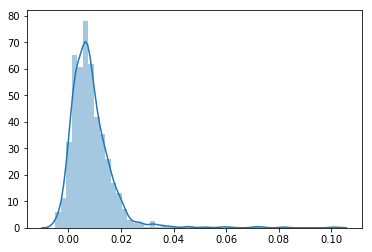

In [18]:
data = np.array(r2ss)
aver_data = np.average(data, axis=0)
sns.distplot(aver_data)

In [67]:
data = np.array(r2ss)
aver_data = np.average(data, axis=0)
# sns.distplot(aver_data, ax = 3)

# basic scatterplot
sns.lmplot(data = aver_data)
 
# control x and y limits
sns.plt.ylim(0, 20)
sns.plt.xlim(0, None)

#sns.plt.show()


TypeError: lmplot() missing 2 required positional arguments: 'x' and 'y'

In [19]:
avg = np.average(aver_data)
avg

0.008614888319099543

In [ ]:
fig, axes= plt.subplots(1, 1, tight_layout=True)
axes.hist(aver_data, bins=20)

## Analyze score and R^2

In [ ]:
regressor.score(X_test, Y_test)

In [ ]:
sns.distplot(x_fs_scores)

## Plot the estimates

In [ ]:
plt.figure()
s = 35
a = .7

Y_train_pred = regressor.predict(X_train)

plt.scatter(Y_test[:, 0], Y_test[:, 1], edgecolor='k',
            c="blue", s=s, marker="s", alpha=a, label="Data")
plt.scatter(Y_test_pred[:, 0], Y_test_pred[:, 1], edgecolor='k',
            c="red", s=s, marker="^", alpha=a,
            label="RF score=%.2f" % regressor.score(X_test, Y_test))
plt.scatter(Y_train_pred[:, 0], Y_train_pred[:, 1], edgecolor='k',
            c="yellow", s=s, marker="o", alpha=a,
            label="RF score=%.2f" % regressor.score(X_train, Y_train))

plt.xlim([-4, 4])
plt.ylim([-4, 4])
plt.title("Visualizing Random Forest")
plt.legend()

plt.savefig('Presentation_figures/RanFor_test', bbox_inches = 'tight')
plt.show()

In [ ]:
sns.distplot(r2ss[3])

## For Gradient Boosting

In [ ]:
r2ss = []
cv = model_selection.KFold(n_splits=4, shuffle=True)
start = time.time()

for i in list(Y.columns):
    Y_i = Y[i]
    for train_idx, test_idx in cv.split(X):
        X_train, Y_train = X[train_idx], Y_i[train_idx]
        X_test, Y_test = X[test_idx], Y_i[test_idx]

        regressor.fit(X_train, Y_train)
        Y_test_pred = regressor.predict(X_test)

        r2s = metrics.r2_score(Y_test, Y_test_pred, multioutput='raw_values')
        r2ss.append(r2s)

end = time.time()
print(end-start)

new_r2ss = [r2ss[i][0] for i in range(len(r2ss))]

In [ ]:
i

In [ ]:
sns.distplot(new_r2ss)

In [ ]:
np.average(new_r2ss)

## What genes give positive R^2

In [ ]:
desired_genes = []
for array in r2ss:
    for gene in array:
        if gene >0.1:
            desired_genes.append(list(array).index(gene))

In [ ]:
len(set(desired_genes))

In [ ]:
print(sorted(desired_genes)[:10])

In [ ]:
cnt = Counter()
for gene in desired_genes:
    cnt[gene] += 1
dict(cnt)
keep_genes = []
for entry in cnt.items():
    if entry[1] >= 3:
        keep_genes.append(entry[0])

In [ ]:
len(keep_genes)

In [ ]:
## Keep all the gene signatures that give a positive value
columns_keep = list(set(desired_genes))

In [ ]:
## Keep gene signatures that give a positive value if they do that for 3/4 or 4/4 iterations
columns_keep = []
for i in Counter(desired_genes).most_common():
    columns_keep.append(i[0])

In [ ]:
r2ss

## Save the R^2 values

In [ ]:
L1000_6fps_scaf_RanFor20_r2_newY = aver_data

In [ ]:
## variables

# L1000_MorgTortAP_RanFor100_r2
# L1000_MorgTortAP_RidgeCV4_r2
# L1000_MorgTortAP_RidgeCV10_r2
# L1000_MorgTortAP_MTL_r2
# L1000_MorgTortAP_RidgeCV_r2
# L1000_MorgTortAP_RidgeCV20_r2
# L1000_MorgTortAP_RanFor100warmstart_r2
# L1000_MorgTortAP_RanFor10warmstart_r2
# L1000_MorgTortAP_RanFor200warmstart_r2


# np.save('L1000_r2s/L1000_MorgTortAP_RanFor100_r2', L1000_MorgTortAP_RanFor100_r2)
# np.save('L1000_r2s/L1000_MorgTortAP_RidgeCV4_r2', L1000_MorgTortAP_RidgeCV4_r2)
# np.save('L1000_r2s/L1000_MorgTortAP_RidgeCV10_r2', L1000_MorgTortAP_RidgeCV10_r2)
# np.save('L1000_r2s/L1000_MorgTortAP_MTL_r2', L1000_MorgTortAP_MTL_r2)
# np.save('L1000_r2s/L1000_MorgTortAP_RidgeCV_r2', L1000_MorgTortAP_RidgeCV_r2)
# np.save('L1000_r2s/L1000_MorgTortAP_RidgeCV20_r2', L1000_MorgTortAP_RidgeCV20_r2)
# np.save('L1000_r2s/L1000_MorgTortAP_RanFor100warmstart_r2', L1000_MorgTortAP_RanFor100warmstart_r2)
# np.save('L1000_r2s/L1000_MorgTortAP_RanFor10warmstart_r2', L1000_MorgTortAP_RanFor10warmstart_r2)
# np.save('L1000_r2s/L1000_MorgTortAP_RanFor200warmstart_r2', L1000_MorgTortAP_RanFor200warmstart_r2)
# np.save('L1000_r2s/L1000_MorgTort_RanFor10warmstart_r2', L1000_MorgTort_RanFor10warmstart_r2)
np.save('L1000_r2s/L1000_6fps_scaf_RanFor20_r2_newY', L1000_6fps_scaf_RanFor20_r2_newY)

In [ ]:
file = np.load('L1000_r2s/L1000_6fps_scaf_RanFor20_r2_newY.npy')
np.average(file)

## Plot estimator vs time/r^2 for random forest

In [ ]:
estimator = [5,10,20,50,75,100,400]
time = [8.63,17.88,31.06,73.46,110.39,143.9,641.10]
r2 = [-0.12,-0.038,0.0105,0.055,0.051,0.0307,0.0225]

fig, ax1 = plt.subplots()

plt.xlabel('Number of estimators', fontsize= 14)
plt.xticks(fontsize = 11)

ax1.plot(estimator,time,color='purple', linewidth = 2.5)
ax1.tick_params(axis = 'y', labelcolor = 'purple', labelsize = 11.0)
plt.ylabel('Time (s)', fontsize = 14, color = 'purple')


ax2 = ax1.twinx()

ax2.plot(estimator, r2, color = 'blue', linewidth = 2.0)
ax2.tick_params(axis = 'y', labelcolor = 'blue', labelsize = 11.0)
plt.ylabel('R^2 Value', fontsize = 14, color = 'blue')

fig.tight_layout()
plt.title('Estimators vs. Time and R^2 Value', fontsize = 15)
plt.savefig('Presentation_figures/estimators_time_r2_ranfor' ,bbox_inches = 'tight')
plt.show()


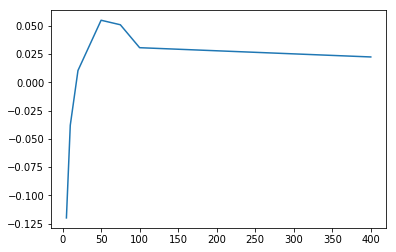